# <h1> Importing Libraries & Dataset </h1> #

In [ ]:
!pip install optuna
!pip install lazypredict
!pip install catboost

In [ ]:
#Basic Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

#Preparation Libraries
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import re

#Imputation Libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Model Libraries
import lazypredict
from lazypredict.Supervised import LazyRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from catboost import CatBoostRegressor, Pool, cv
import xgboost as xgb

#Metric Libraries
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold
from sklearn import metrics
from math import sqrt

#Hyperparameter Tuning Libraries
import optuna
from optuna.samplers import TPESampler

#Submission Libraries
import pickle

#Other Libraries
import time
import warnings
import os
import requests

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:.8f}'.format)

print("Done")

Done


In [ ]:
df_train = pd.read_csv("https://github.com/JeftaAdriel/MLC-DataSlayer1.0/raw/main/Data/trainrev.csv")
df_test = pd.read_csv("https://github.com/JeftaAdriel/MLC-DataSlayer1.0/raw/main/Data/testrev.csv")
print("Done")

Done


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


In [ ]:
df_train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180
...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS),318
54933,54934,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS),303
54934,54935,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km,410
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km,466


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     23545 non-null  int64 
 1   Make                   23545 non-null  object
 2   Vehicle Class          23326 non-null  object
 3   Engine Size(L)         22913 non-null  object
 4   Cylinders              23039 non-null  object
 5   Transmission           23382 non-null  object
 6   Fuel Type              23324 non-null  object
 7   Fuel Consumption City  22861 non-null  object
 8   Fuel Consumption Hwy   22824 non-null  object
 9   Fuel Consumption Comb  22857 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


In [ ]:
df_test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km
...,...,...,...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.0,4.0,M5,X,NaN,13.33 km/L,8.98 L/100km
23541,78479,CHEVO,COMPACT,1.4,4.0,M6,X,27.04 MPG (AS),18.18 km per L,0.73 L/10km
23542,78480,KIO,SUV - SMALL,unknown,4.0,AS6,X,11.60 L/100km,8.40 liters per 100 km,9.84 km per L
23543,78481,JIPU,SUV - SMALL,2.4,4.0,A9,X,9.52 km/L,0.84 L/10km,0.96 L/10km


# <h1> Part 1: Preprocessing </h1> #

In [ ]:
df_train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180
...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS),318
54933,54934,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS),303
54934,54935,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km,410
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km,466


In [ ]:
df_test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km
...,...,...,...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.0,4.0,M5,X,NaN,13.33 km/L,8.98 L/100km
23541,78479,CHEVO,COMPACT,1.4,4.0,M6,X,27.04 MPG (AS),18.18 km per L,0.73 L/10km
23542,78480,KIO,SUV - SMALL,unknown,4.0,AS6,X,11.60 L/100km,8.40 liters per 100 km,9.84 km per L
23543,78481,JIPU,SUV - SMALL,2.4,4.0,A9,X,9.52 km/L,0.84 L/10km,0.96 L/10km


In [ ]:
y_train = df_train.iloc[:, [-1]]
y_train

,CO2 Emissions(g/km)
0,208
1,325
2,170
3,362
4,180
...,...
54932,318
54933,303
54934,410
54935,466


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   CO2 Emissions(g/km)  54937 non-null  int64
dtypes: int64(1)
memory usage: 429.3 KB


Akan dilakukan penggabungan untuk data train dan data test. Namun sebelum dilakukan penggabungan, akan dilakukan drop variabel CO2 Emission (g/km) dari data train dan disimpan pada data frame baru yaitu df.

In [ ]:
df = pd.concat([df_train.drop(["CO2 Emissions(g/km)"], axis = 1, inplace = False), df_test], ignore_index = True)
df.drop(['Id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78482 entries, 0 to 78481
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make                   78482 non-null  object
 1   Vehicle Class          77724 non-null  object
 2   Engine Size(L)         76457 non-null  object
 3   Cylinders              76778 non-null  object
 4   Transmission           77909 non-null  object
 5   Fuel Type              77715 non-null  object
 6   Fuel Consumption City  76230 non-null  object
 7   Fuel Consumption Hwy   76060 non-null  object
 8   Fuel Consumption Comb  76120 non-null  object
dtypes: object(9)
memory usage: 5.4+ MB


## <h2> Duplicate Data </h2> ##

In [ ]:
df[df.duplicated(keep=False)]

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
821,DOGE,FULL-SIZE,3.6,6.0,A8,X,7.69 km/L,24.76 MPG (AS),8.75 km per L
13115,TOLVO,STATION WAGON - SMALL,2.0,4.0,AS8,X,10.10 L/100 km,8.20 liters per 100 km,30.56 mpg Imp.
15238,CHEVO,SUV - STANDARD,5.3,8.0,A6,X,4.67 km per L,11.30 L/100 km,5.93 km per L
35352,CHEVO,SUV - STANDARD,5.3,8.0,A6,X,4.67 km per L,11.30 L/100 km,5.93 km per L
35353,TOLVO,STATION WAGON - SMALL,2.0,4.0,AS8,X,10.10 L/100 km,8.20 liters per 100 km,30.56 mpg Imp.
52029,CHEVO,COMPACT,1.4,4.0,AS6,X,8.60 L/100 km,7.10 L/100km,35.64 mpg Imp.
52252,CHEVO,COMPACT,1.4,4.0,AS6,X,8.60 L/100 km,7.10 L/100km,35.64 mpg Imp.
62160,DOGE,FULL-SIZE,3.6,6.0,A8,X,7.69 km/L,24.76 MPG (AS),8.75 km per L


Setelah memeriksa duplikasi dalam data, ditemukan beberapa baris yang identik. Oleh karena itu, baris-baris yang memiliki duplikasi akan dihapus. Baris duplikat yang dihapus hanyalah baris-baris asli di df_train

In [ ]:
df_train.drop(["Id", "CO2 Emissions(g/km)"], inplace=True, axis=1)
df_train[df_train.duplicated(keep=False)]

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
13115,TOLVO,STATION WAGON - SMALL,2.0,4.0,AS8,X,10.10 L/100 km,8.20 liters per 100 km,30.56 mpg Imp.
15238,CHEVO,SUV - STANDARD,5.3,8.0,A6,X,4.67 km per L,11.30 L/100 km,5.93 km per L
35352,CHEVO,SUV - STANDARD,5.3,8.0,A6,X,4.67 km per L,11.30 L/100 km,5.93 km per L
35353,TOLVO,STATION WAGON - SMALL,2.0,4.0,AS8,X,10.10 L/100 km,8.20 liters per 100 km,30.56 mpg Imp.
52029,CHEVO,COMPACT,1.4,4.0,AS6,X,8.60 L/100 km,7.10 L/100km,35.64 mpg Imp.
52252,CHEVO,COMPACT,1.4,4.0,AS6,X,8.60 L/100 km,7.10 L/100km,35.64 mpg Imp.


In [ ]:
df_train.drop_duplicates(keep='last', inplace=True)
y_train.drop([13115, 15238, 52029], axis=0, inplace=True)

df_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
df_train[df_train.duplicated(keep=False)]

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb


In [ ]:
df_test.drop(["Id"], inplace=True, axis=1)
df_test[df_test.duplicated(keep=False)]

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb


In [ ]:
df = pd.concat([df_train, df_test], ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78479 entries, 0 to 78478
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make                   78479 non-null  object
 1   Vehicle Class          77721 non-null  object
 2   Engine Size(L)         76454 non-null  object
 3   Cylinders              76775 non-null  object
 4   Transmission           77906 non-null  object
 5   Fuel Type              77712 non-null  object
 6   Fuel Consumption City  76227 non-null  object
 7   Fuel Consumption Hwy   76057 non-null  object
 8   Fuel Consumption Comb  76117 non-null  object
dtypes: object(9)
memory usage: 5.4+ MB


In [ ]:
df[df.duplicated(keep=False)]

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
821,DOGE,FULL-SIZE,3.6,6.0,A8,X,7.69 km/L,24.76 MPG (AS),8.75 km per L
62157,DOGE,FULL-SIZE,3.6,6.0,A8,X,7.69 km/L,24.76 MPG (AS),8.75 km per L


In [ ]:
df_train

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km
1,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.
3,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km
4,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km
...,...,...,...,...,...,...,...,...,...
54929,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS)
54930,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS)
54931,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km
54932,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km


In [ ]:
y_train

,CO2 Emissions(g/km)
0,208
1,325
2,170
3,362
4,180
...,...
54929,318
54930,303
54931,410
54932,466


## <h2> Missing Values Part 1 </h2> ##

In [ ]:
df.isna().sum()

Make                        0
Vehicle Class             758
Engine Size(L)           2025
Cylinders                1704
Transmission              573
Fuel Type                 767
Fuel Consumption City    2252
Fuel Consumption Hwy     2422
Fuel Consumption Comb    2362
dtype: int64

In [ ]:
df.isna().sum()/len(df)

Make                    0.00000000
Vehicle Class           0.00965863
Engine Size(L)          0.02580308
Cylinders               0.02171281
Transmission            0.00730132
Fuel Type               0.00977332
Fuel Consumption City   0.02869557
Fuel Consumption Hwy    0.03086176
Fuel Consumption Comb   0.03009722
dtype: float64

In [ ]:
cat_col = cat_col = ['Make', 'Vehicle Class', 'Cylinders', 'Engine Size(L)', 'Transmission', 'Fuel Type']
for i in cat_col:
  df[i] = df[i].astype('category')
  print(f"Value Counts for {i}: ")
  print(df[i].value_counts())
  print("")

Value Counts for Make: 
FOLD            10314
CHEVO            9450
BMV              8431
TOYOTI           5345
NIRRAN           4200
DOGE             4043
JIPU             4034
KIO              3694
GONDA            3622
RYUNDAI          3427
FOLKSWA          3225
LECUS            2969
MATSUDA          2909
CADILUXE         2674
BARUSU           2195
TOLVO            2007
MITSU            1519
LAND CRAWLER     1349
ASURA            1229
FIAR             1164
LAMBOGI           679
Name: Make, dtype: int64

Value Counts for Vehicle Class: 
SUV - SMALL                 15675
COMPACT                     12954
MID-SIZE                    11991
SUV - STANDARD               6700
FULL-SIZE                    5837
PICKUP TRUCK - STANDARD      5466
SUBCOMPACT                   5129
STATION WAGON - SMALL        3428
TWO-SEATER                   2333
PICKUP TRUCK - SMALL         1870
MINIVAN                      1001
MINICOMPACT                   952
SPECIAL PURPOSE VEHICLE       846
VAN - PASSENG

Akan dilakukan pembersihan data dengan menggantikan beberapa nilai yang dianggap tidak relevan, seperti 'not-recorded', 'missing', 'not-available', dan lainnya, dengan nilai NaN. Dengan langkah ini, data yang tidak sesuai atau tidak dapat diinterpretasikan dapat diidentifikasi dan diatasi secara konsisten.

In [ ]:
nan_kw = ['not-recorded', 'missing', 'not-available', 'unspecified', 'unestablished', 'na', 'unknown', '-1', 'zero', '-9999', '9999', '0']
for i in cat_col:
  df[i].replace(nan_kw, np.nan, inplace=True)
  print(f"Value Counts for {i}: ")
  print(df[i].value_counts(dropna=False))  # Include NaN in the value counts
  print("")

Value Counts for Make: 
FOLD            10314
CHEVO            9450
BMV              8431
TOYOTI           5345
NIRRAN           4200
DOGE             4043
JIPU             4034
KIO              3694
GONDA            3622
RYUNDAI          3427
FOLKSWA          3225
LECUS            2969
MATSUDA          2909
CADILUXE         2674
BARUSU           2195
TOLVO            2007
MITSU            1519
LAND CRAWLER     1349
ASURA            1229
FIAR             1164
LAMBOGI           679
Name: Make, dtype: int64

Value Counts for Vehicle Class: 
SUV - SMALL                 15675
COMPACT                     12954
MID-SIZE                    11991
SUV - STANDARD               6700
FULL-SIZE                    5837
PICKUP TRUCK - STANDARD      5466
SUBCOMPACT                   5129
STATION WAGON - SMALL        3428
NaN                          2914
TWO-SEATER                   2333
PICKUP TRUCK - SMALL         1870
MINIVAN                      1001
MINICOMPACT                   952
SPECIAL PURPO

In [ ]:
num_col = ['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']
for i in num_col:
  print(f"Value Counts for {i}: ")
  print(df[i].value_counts())
  print("")

Value Counts for Fuel Consumption City: 
not-available     588
zero              526
10.70 L/100 km    160
10.90 L/100km     157
10.90 L/100 km    156
                 ... 
9.37 MPG (AS)       1
3.82 km per L       1
3.89 km per L       1
11.67 mpg Imp.      1
24.10 L/100 km      1
Name: Fuel Consumption City, Length: 1853, dtype: int64

Value Counts for Fuel Consumption Hwy: 
zero              607
not-available     601
8.00 L/100 km     258
36.69 mpg Imp.    256
7.40 L/100 km     246
                 ... 
13.07 MPG (AS)      1
13.52 MPG (AS)      1
21.74 km per L      1
47.04 MPG (AS)      1
14.49 mpg Imp.      1
Name: Fuel Consumption Hwy, Length: 1259, dtype: int64

Value Counts for Fuel Consumption Comb: 
not-available             615
zero                      612
0.98 L/10km               192
0.94 L/10km               187
0.91 L/10km               178
                         ... 
6.69 liters per 100 km      1
55.44 mpg Imp.              1
15.02 mpg Imp.              1
13.20 mpg I

In [ ]:
nan_kw = ['not-recorded', 'missing', 'not-available', 'unspecified', 'unestablished', 'na', 'unknown', '-1', 'zero', '-9999', '9999', '0', np.nan]
num_col = ['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']

for i in num_col:
  df[i].replace(nan_kw, 'Unknown', inplace=True)
  print(f"Value Counts for {i}: ")
  print(df[i].value_counts(dropna=False))
  print("")

Value Counts for Fuel Consumption City: 
Unknown                    3366
10.70 L/100 km              160
10.90 L/100km               157
10.90 L/100 km              156
10.40 liters per 100 km     152
                           ... 
24.50 liters per 100 km       1
8.81 MPG (AS)                 1
27.80 liters per 100 km       1
3.79 km/L                     1
24.10 L/100 km                1
Name: Fuel Consumption City, Length: 1852, dtype: int64

Value Counts for Fuel Consumption Hwy: 
Unknown           3630
8.00 L/100 km      258
36.69 mpg Imp.     256
7.40 L/100 km      246
0.74 L/10km        246
                  ... 
47.04 MPG (AS)       1
19.90 L/100 km       1
20.50 L/100 km       1
11.64 MPG (AS)       1
14.49 mpg Imp.       1
Name: Fuel Consumption Hwy, Length: 1258, dtype: int64

Value Counts for Fuel Consumption Comb: 
Unknown                   3589
0.98 L/10km                192
0.94 L/10km                187
0.91 L/10km                178
0.90 L/10km                176
     

## <h2> Standardizing `fuel consumption` Variables </h2> ##

Satuan dari variabel-variabel `Fuel Consumption` masih saling berbeda antar observasinya, sehingga perlu nilainya perlu distandarisasi terlebih dahulu ke dalam satuan liter/100 kilometer (sesuai standar Kanada)

In [ ]:
conversion_rates = {'liters per 100 km': 1, 'L/100km': 1, 'L/100 km': 1,
                    'L/10km': 10, 'km per L': lambda x: 100 / x,
                    'km/L': lambda x: 100 / x,
                    'MPG (AS)': lambda x: 235.214583 / x,  # US gallon
                    'mpg Imp.': lambda x: 282.4809363 / x,  # Imperial gallon
                    '': np.nan}

def convert_fuel_consumption(value):
    value = str(value).strip()
    if value.lower() == 'unknown':
        return np.nan  # Return NaN for 'Unknown' values

    # Extract numeric value using regular expression
    numeric_match = re.search(r'\d+\.\d+|\d+', value)
    numeric_value = float(numeric_match.group()) if numeric_match else np.nan

    # Extract unit by splitting the string and getting the last element
    units = ' '.join(value.split(' ')[1:]).strip()

    # Apply conversion rate based on unit
    conversion_rate = conversion_rates.get(units, np.nan)
    if callable(conversion_rate):
        return conversion_rate(numeric_value)
    elif conversion_rate is not np.nan:
        return numeric_value * conversion_rate
    else:
        return np.nan  # Return NaN for unrecognized units


In [ ]:
df['FC_City'] = df['Fuel Consumption City'].apply(convert_fuel_consumption)
df['FC_Highway'] = df['Fuel Consumption Hwy'].apply(convert_fuel_consumption)
df['FC_Combination'] = df['Fuel Consumption Comb'].apply(convert_fuel_consumption)

In [ ]:
cols = ['FC_City', 'FC_Highway', 'FC_Combination']

for i in cols:
  print(f"Value Counts for {i}: ")
  print(df[i].value_counts(dropna=False))
  print("")

Value Counts for FC_City: 
NaN            3366
10.00000000     692
10.90000000     561
10.20000000     542
10.40000000     537
               ... 
27.39726027       1
28.98550725       1
29.30000000       1
25.79107270       1
29.00303120       1
Name: FC_City, Length: 1021, dtype: int64

Value Counts for FC_Highway: 
NaN            3630
8.00000000     1389
7.40000000      939
7.70000000      922
7.60000000      898
               ... 
19.29570000       1
20.10381051       1
4.60032433        1
18.50626145       1
19.49488863       1
Name: FC_Highway, Length: 667, dtype: int64

Value Counts for FC_Combination: 
NaN            3589
9.30000000      232
9.80000000      227
9.70000000      222
10.00000000     219
               ... 
7.30491172        1
5.38002248        1
21.41327623       1
22.08587634       1
7.56915692        1
Name: FC_Combination, Length: 6988, dtype: int64



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78479 entries, 0 to 78478
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Make                   78479 non-null  category
 1   Vehicle Class          75565 non-null  category
 2   Engine Size(L)         70946 non-null  category
 3   Cylinders              72062 non-null  category
 4   Transmission           76383 non-null  category
 5   Fuel Type              75734 non-null  category
 6   Fuel Consumption City  78479 non-null  object  
 7   Fuel Consumption Hwy   78479 non-null  object  
 8   Fuel Consumption Comb  78479 non-null  object  
 9   FC_City                75113 non-null  float64 
 10  FC_Highway             74849 non-null  float64 
 11  FC_Combination         74890 non-null  float64 
dtypes: category(6), float64(3), object(3)
memory usage: 4.0+ MB


## <h2> Missing Values Part 2 </h2> ##

Mengimputasi missing values pada variabel 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb' dengan iterative imputer. Dan menamakan variabel tersebut berturut-turut menjadi 'FC_City', 'FC_Highway', dan 'FC_Combination'.

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)

num_col = ['FC_City', 'FC_Highway', 'FC_Combination']

for i in num_col:
  df[[i]] = imputer.fit_transform(df[[i]])

In [ ]:
num_col = ['FC_City', 'FC_Highway', 'FC_Combination']

for i in num_col:
  print(f"Value Counts for {i}: ")
  print(df[i].value_counts(dropna=False))
  print("")

Value Counts for FC_City: 
12.54451545    3366
10.00000000     692
10.90000000     561
10.20000000     542
10.40000000     537
               ... 
27.39726027       1
28.98550725       1
29.30000000       1
25.79107270       1
29.00303120       1
Name: FC_City, Length: 1021, dtype: int64

Value Counts for FC_Highway: 
9.13762789     3630
8.00000000     1389
7.40000000      939
7.70000000      922
7.60000000      898
               ... 
19.29570000       1
20.10381051       1
4.60032433        1
18.50626145       1
19.49488863       1
Name: FC_Highway, Length: 667, dtype: int64

Value Counts for FC_Combination: 
11.01364128    3589
9.30000000      232
9.80000000      227
9.70000000      222
10.00000000     219
               ... 
7.30491172        1
5.38002248        1
21.41327623       1
22.08587634       1
7.56915692        1
Name: FC_Combination, Length: 6988, dtype: int64



In [ ]:
df.drop(['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb'], axis=1, inplace=True)

# <h1> Part 2: Feature Engineering </h1> #

In [ ]:
df.describe()

,FC_City,FC_Highway,FC_Combination
count,78479.00000000,78479.00000000,78479.00000000
mean,12.54451545,9.13762789,11.01364128
std,3.76552279,2.28985007,2.90383848
min,4.19983551,4.00000000,4.20000000
25%,10.00000000,7.50187547,8.93000000
50%,11.90000000,8.70000000,10.49000000
75%,14.90312966,10.20408163,12.85757562
max,30.50000000,20.50693836,25.70000000


In [ ]:
df

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,FC_City,FC_Highway,FC_Combination
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.90476190,7.20000000,9.80000000
1,TOYOTI,PICKUP TRUCK - SMALL,NaN,6.0,A5,X,13.79310345,9.70000000,11.96000000
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.20408163,7.29924900,8.89423603
3,CHEVO,VAN - PASSENGER,NaN,8.0,A6,X,17.30000000,11.70000000,14.78000000
4,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10000000,7.89935504,8.01000000
...,...,...,...,...,...,...,...,...,...
78474,MITSU,SUV - SMALL,2.0,4.0,M5,X,12.54451545,7.50187547,8.98000000
78475,CHEVO,COMPACT,1.4,4.0,M6,X,8.69876416,5.50055006,7.30000000
78476,KIO,SUV - SMALL,NaN,4.0,AS6,X,11.60000000,8.40000000,10.16260163
78477,JIPU,SUV - SMALL,2.4,4.0,A9,X,10.50420168,8.40000000,9.60000000


In [ ]:
df['Transmission'].value_counts()

AS6     17490
AS8     11967
M6      10952
A6       7421
AV       4537
A8       3976
M5       2946
AS10     2619
AM7      2100
A9       2047
AV6      1745
AV7      1681
AM6      1499
A5       1299
AS9       992
A4        815
AV8       515
AS7       462
AS5       425
A10       242
AM8       212
AV10      195
M7        170
AM9        49
A7         27
Name: Transmission, dtype: int64

In [ ]:
df.loc[df.loc[:, 'Transmission']=='AV6', :]

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,FC_City,FC_Highway,FC_Combination
107,LECUS,SUV - SMALL,2.5,4.0,AV6,NaN,9.00000000,7.20000000,8.19022720
111,MITSU,NaN,2.0,4.0,AV6,X,9.80060762,7.80000000,8.90000000
117,MITSU,SUV - SMALL,2.4,4.0,AV6,X,8.90000000,8.70000000,8.81000000
146,MITSU,COMPACT,2.0,NaN,AV6,X,8.80281690,7.00000000,7.98722045
212,TOYOTI,MID-SIZE,NaN,4.0,AV6,X,9.30232558,7.19971175,8.36000000
...,...,...,...,...,...,...,...,...,...
78334,BARUSU,COMPACT,2.0,4.0,AV6,X,9.50000000,6.40000000,8.10000000
78373,BARUSU,SUV - SMALL,2.5,4.0,AV6,X,9.80000000,8.50000000,9.20000000
78381,LECUS,SUV - STANDARD,3.5,6.0,AV6,Z,12.00480192,6.10000000,9.34579439
78405,BARUSU,SUV - SMALL,2.0,4.0,AV6,X,11.20000000,8.50340136,9.98003992


## <h2> `Gear_Numbers`, `Transmission_Type`, and `Make_Region` </h2> ##

Akan ditambahkan tiga kolom baru, yaitu 'Gear_Numbers', 'Transmission_Type', dan 'Make_Region' pada df.

Alasan mengapa akan ditambahkan fitur `Gear_Numbers` dan `Transmission_Type` karena kami berhipotesis bahwa ada kemungkinan jenis transmisi terlepas dari jumlah gear yang digunakan dan jumlah gear terlepas dari jenis transmisi yang digunakan itu berpengaruh terhadap kadar CO2 yang dikeluarkan.

In [ ]:
def get_gear_numbers(value):
  value = str(value).strip()
  if pd.isna(value):
    return np.nan

  if value[:2] == 'AV' and value[-1] == 'V':
    return 0

  gear_number_match = re.search(r'\d+', value)
  return int(gear_number_match.group())

def get_transmission_type(value):
  value = str(value).strip()
  if pd.isna(value):
    return np.nan

  if value[:2] in ['AV', 'AM', 'AS']:
    transmission_type = value[:2]
  else:
    transmission_type = value[0]

  return transmission_type

In [ ]:
df['Gear_Numbers'] = df['Transmission'].apply(get_gear_numbers)
df['Transmission_Type'] = df['Transmission'].apply(get_transmission_type)

print(df['Gear_Numbers'].value_counts(dropna=False))
print("")
print(df['Transmission_Type'].value_counts(dropna=False))

6.00000000     39107
8.00000000     16670
5.00000000      4670
0.00000000      4537
7.00000000      4440
9.00000000      3088
10.00000000     3056
NaN             2096
4.00000000       815
Name: Gear_Numbers, dtype: int64

AS     33955
A      15827
M      14068
AV      8673
AM      3860
NaN     2096
Name: Transmission_Type, dtype: int64


In [ ]:
df['Transmission_Type'] = df['Transmission_Type'].astype('category')
df['Gear_Numbers'] = df['Gear_Numbers'].astype('category')

Alasan mengapa akan ditambahkan fitur `Make_Region` karena kami merasa ada beberapa merek mobil yang memiliki beberapa baris observasi saja, sehingga lebih baik apabila dibuat suatu variabel kategorik yang bisa merepresentasikan asal dari mobil tersebut secara lebih baik.

In [ ]:
def categorize_make_by_region(make):
    asian_brands = ['ASURA', 'BARUSU', 'GONDA', 'KIO', 'LECUS', 'MATSUDA', 'MITSU', 'NIRRAN', 'TOYOTI', 'RYNDAI']
    american_brands = ['CADILUXE', 'CHEVO', 'DOGE', 'FOLD', 'JIPU']
    european_brands = ['BMV', 'FOLKSWA', 'FIAR', 'LAMBOGI', 'TOLVO', 'LAND CRAWLER']

    if make in asian_brands:
        return 'Asian'
    elif make in american_brands:
        return 'American'
    elif make in european_brands:
        return 'European'
    else:
        return 'Other'

# Apply the function to the 'Make' column to create a new feature
df['Make_Region'] = df['Make'].apply(categorize_make_by_region)
df['Make_Region'] = df['Make_Region'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78479 entries, 0 to 78478
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Make               78479 non-null  category
 1   Vehicle Class      75565 non-null  category
 2   Engine Size(L)     70946 non-null  category
 3   Cylinders          72062 non-null  category
 4   Transmission       76383 non-null  category
 5   Fuel Type          75734 non-null  category
 6   FC_City            78479 non-null  float64 
 7   FC_Highway         78479 non-null  float64 
 8   FC_Combination     78479 non-null  float64 
 9   Gear_Numbers       76383 non-null  category
 10  Transmission_Type  76383 non-null  category
 11  Make_Region        78479 non-null  category
dtypes: category(9), float64(3)
memory usage: 2.5 MB


# <h1> Part 3: EDA </h1> #

In [ ]:
y_train

,CO2 Emissions(g/km)
0,208
1,325
2,170
3,362
4,180
...,...
54929,318
54930,303
54931,410
54932,466


In [ ]:
df_train = df.loc[:54933, :]
df_train['y_train'] = y_train
df_train

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,FC_City,FC_Highway,FC_Combination,Gear_Numbers,Transmission_Type,Make_Region,y_train
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.90476190,7.20000000,9.80000000,8.00000000,AV,Asian,208
1,TOYOTI,PICKUP TRUCK - SMALL,NaN,6.0,A5,X,13.79310345,9.70000000,11.96000000,5.00000000,A,Asian,325
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.20408163,7.29924900,8.89423603,6.00000000,AS,Asian,170
3,CHEVO,VAN - PASSENGER,NaN,8.0,A6,X,17.30000000,11.70000000,14.78000000,6.00000000,A,American,362
4,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10000000,7.89935504,8.01000000,6.00000000,M,Asian,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54929,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90000000,8.80281690,10.50534091,10.00000000,AS,American,318
54930,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,21.00000000,10.60000000,16.32301062,6.00000000,M,American,303
54931,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20000000,12.50000000,15.63000000,7.00000000,AM,American,410
54932,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30000000,9.90000000,14.52000000,8.00000000,A,American,466


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54934 entries, 0 to 54933
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Make               54934 non-null  category
 1   Vehicle Class      52883 non-null  category
 2   Engine Size(L)     49670 non-null  category
 3   Cylinders          50411 non-null  category
 4   Transmission       53451 non-null  category
 5   Fuel Type          52992 non-null  category
 6   FC_City            54934 non-null  float64 
 7   FC_Highway         54934 non-null  float64 
 8   FC_Combination     54934 non-null  float64 
 9   Gear_Numbers       53451 non-null  category
 10  Transmission_Type  53451 non-null  category
 11  Make_Region        54934 non-null  category
 12  y_train            54934 non-null  int64   
dtypes: category(9), float64(3), int64(1)
memory usage: 2.2 MB


Akan dilakukan visualisasi pada variabel numerik menggunakan histogram untuk melihat distribusi data dalam kolom yang bertipe numerik.

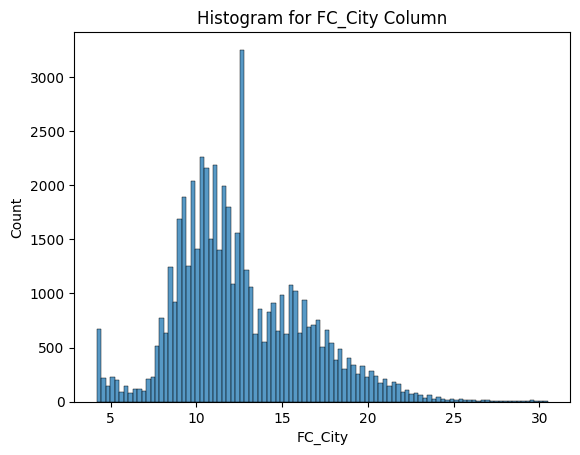

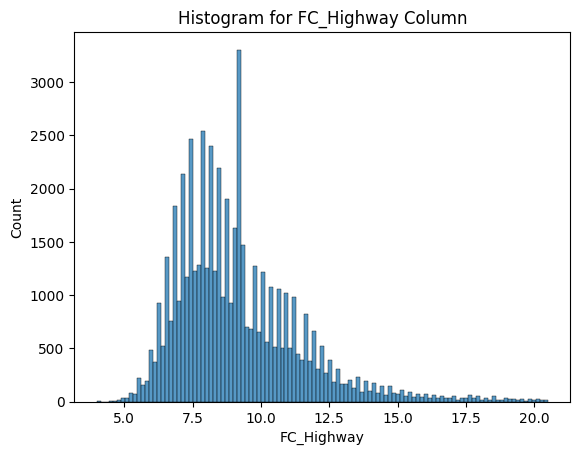

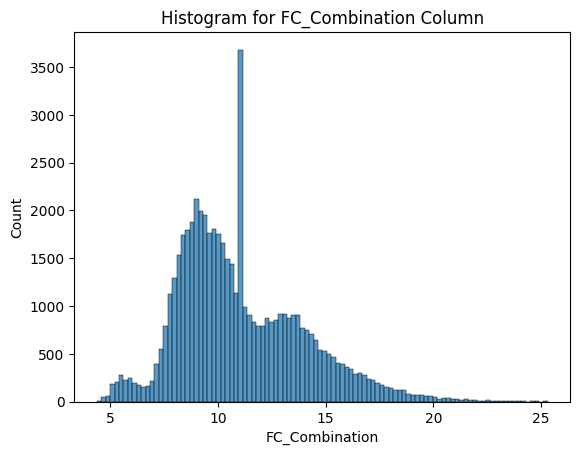

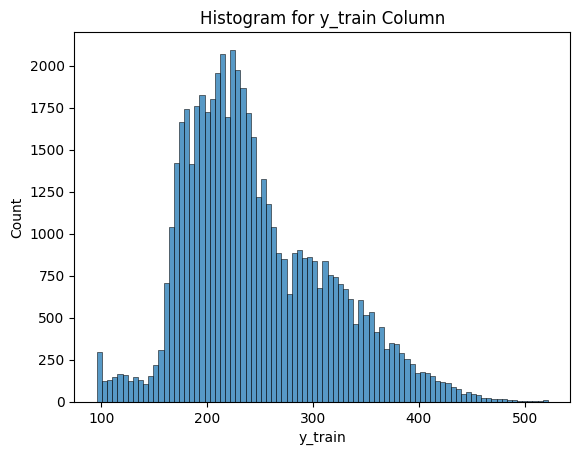

In [ ]:
num = df_train.select_dtypes(include = np.number).columns.tolist()
for n in num:
  sns.histplot(x = n, data = df_train)
  plt.title(f"Histogram for {n} Column")
  print("")
  plt.show()

Akan dilihat scatterplot antara variabel numerik dengan kadar CO2

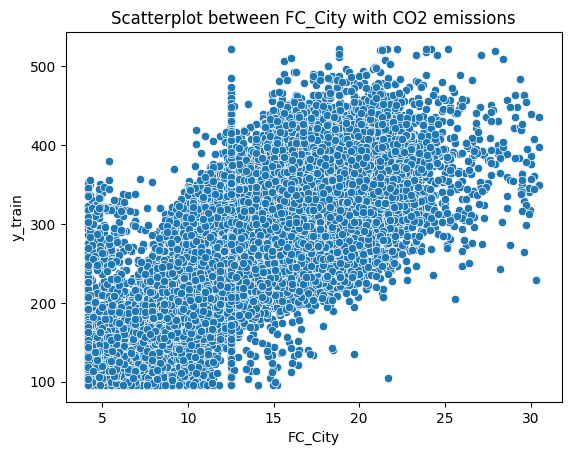

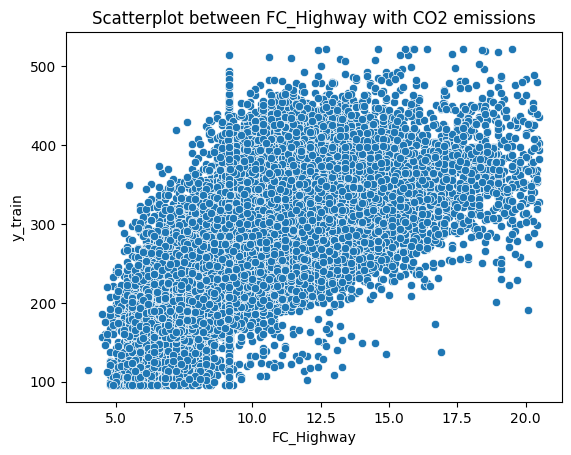

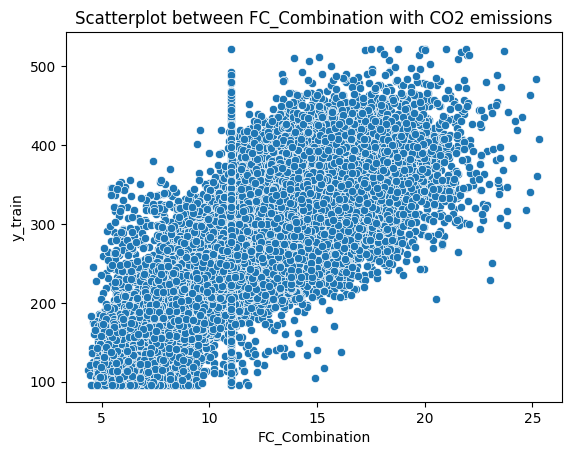

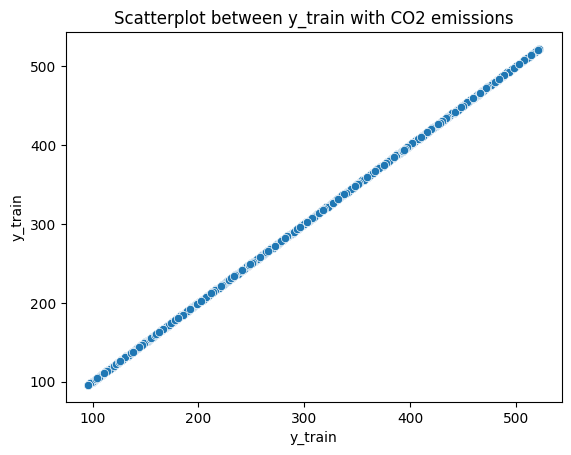

In [ ]:
num = df_train.select_dtypes(include = np.number).columns.tolist()
for n in num:
  sns.scatterplot(x = n, y = 'y_train', data = df_train)
  plt.title(f"Scatterplot between {n} with CO2 emissions")
  print("")
  plt.show()

Dari visualisasi di atas, terlihat adanya titik-titik yang lurus ke atas. Ini bisa mengindikasikan adanya hubungan linear positif yang kuat antara variabel input dan variabel target. Ini artinya semakin besar nilai variabel input, semakin besar pula nilai variabel target yaitu CO2 Emission.

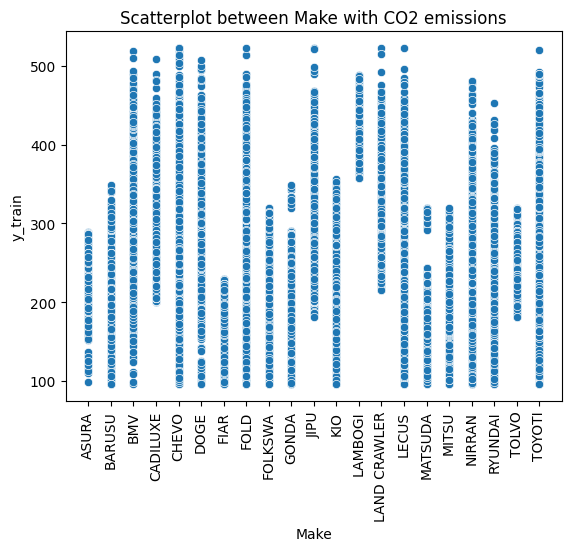

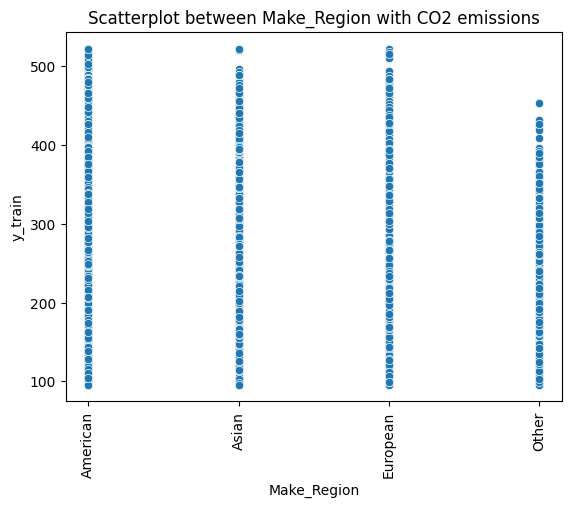

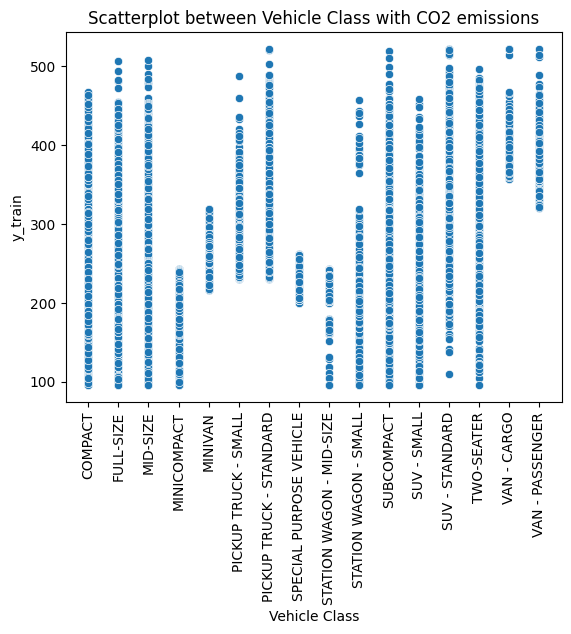

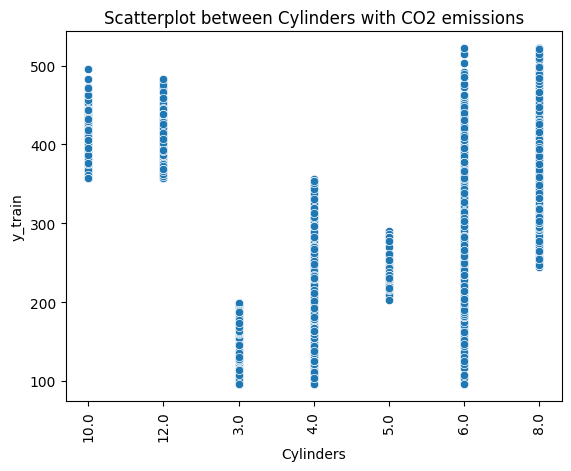

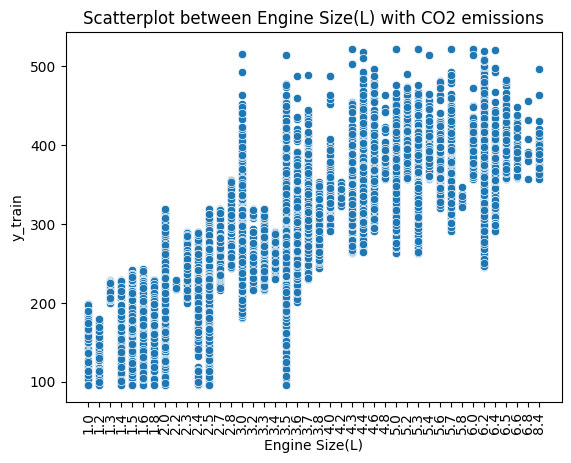

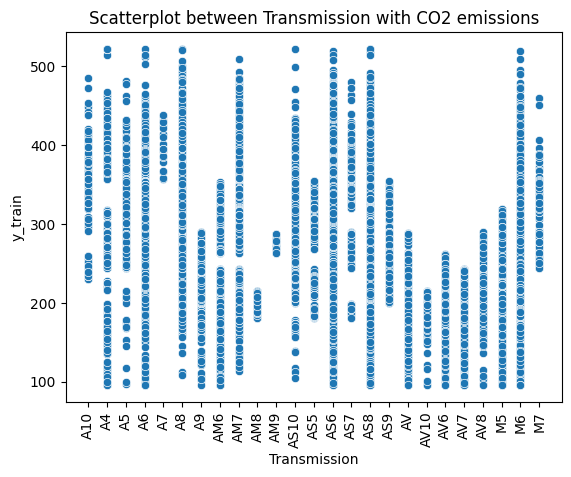

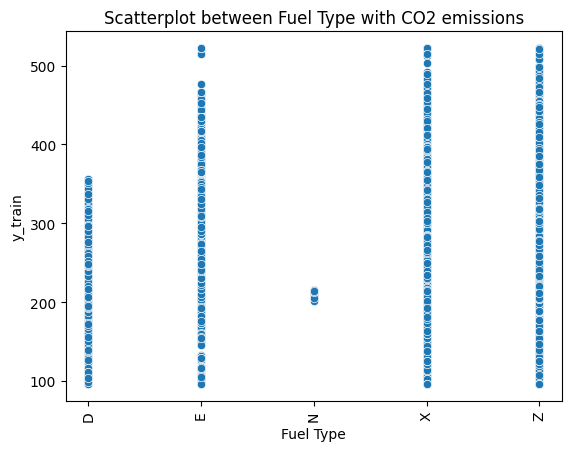

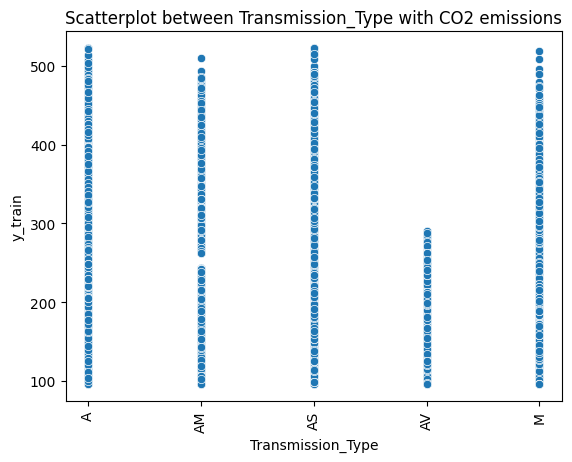

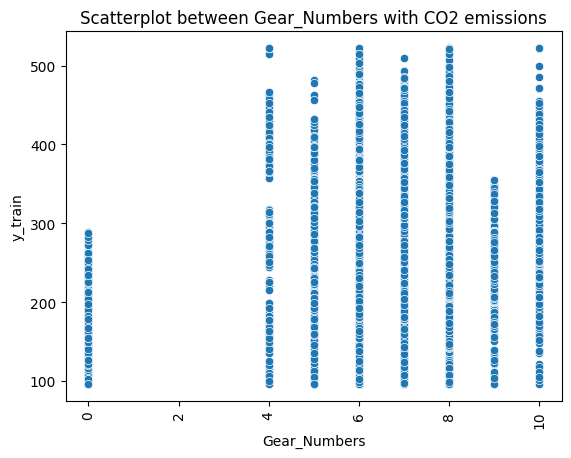

In [ ]:
cat_col = ['Make', 'Make_Region', 'Vehicle Class', 'Cylinders', 'Engine Size(L)', 'Transmission', 'Fuel Type', 'Transmission_Type', 'Gear_Numbers']
for c in cat_col:
  sns.scatterplot(x = c, y = 'y_train', data = df_train)
  plt.title(f"Scatterplot between {c} with CO2 emissions")
  plt.xticks(rotation=90)
  print("")
  plt.show()

Terihat ada beberapa value di dalam suatu variabel kategorik yang memiliki kadar CO2 lebih tinggi dibandingkan value lainnya.

<Axes: >

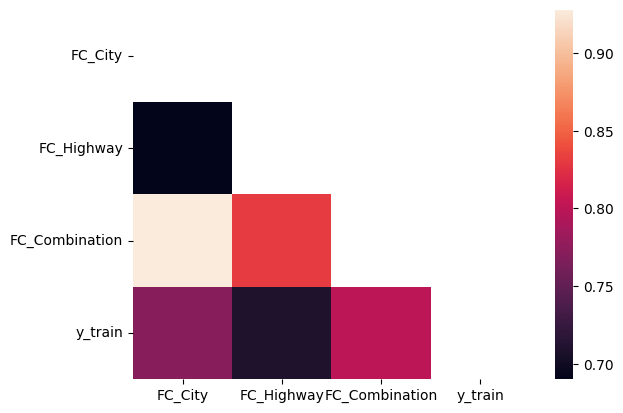

In [ ]:
num = df_train.select_dtypes(include = np.number)
corr = num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask)

Dari visualisasi di atas, terlihat adanya korelasi yang cukup kuat antara variabel FC_Combination dan FC_City. Namun, ketika melihat secara keseluruhan, seluruh pasangan variabel memiliki korelasi yang cukup signifikan, dan tidak ada yang mendekati nilai nol.

In [ ]:
cat_col = ['Make', 'Make_Region', 'Vehicle Class', 'Cylinders', 'Engine Size(L)', 'Transmission', 'Fuel Type', 'Transmission_Type', 'Gear_Numbers']

for c in cat_col:
  print(df_train.groupby([c])['y_train'].agg(['mean', 'median']))
  print("")

                     mean       median
Make                                  
ASURA        221.90330189 225.00000000
BARUSU       215.69602649 214.00000000
BMV          261.42635659 241.00000000
CADILUXE     274.12908497 256.00000000
CHEVO        272.84665357 279.00000000
DOGE         289.59823322 282.00000000
FIAR         191.43960149 192.00000000
FOLD         271.30305544 265.00000000
FOLKSWA      207.46841637 202.00000000
GONDA        189.88933440 179.00000000
JIPU         255.65411437 237.50000000
KIO          216.20240403 211.00000000
LAMBOGI      392.92468619 386.00000000
LAND CRAWLER 307.47578041 297.00000000
LECUS        247.29975787 244.00000000
MATSUDA      190.02022147 189.00000000
MITSU        204.11080332 204.00000000
NIRRAN       241.30966200 225.00000000
RYUNDAI      214.63891179 205.00000000
TOLVO        231.08172043 230.00000000
TOYOTI       229.60533333 214.00000000

                    mean       median
Make_Region                          
American    272.34578696 2

# <h1> Part 3.5: Miscellaneous (yet, Necessary) :D </h1> #

## <h2> Pool Data for Catboost </h2> ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78479 entries, 0 to 78478
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Make               78479 non-null  category
 1   Vehicle Class      75565 non-null  category
 2   Engine Size(L)     70946 non-null  category
 3   Cylinders          72062 non-null  category
 4   Transmission       76383 non-null  category
 5   Fuel Type          75734 non-null  category
 6   FC_City            78479 non-null  float64 
 7   FC_Highway         78479 non-null  float64 
 8   FC_Combination     78479 non-null  float64 
 9   Gear_Numbers       76383 non-null  category
 10  Transmission_Type  76383 non-null  category
 11  Make_Region        78479 non-null  category
dtypes: category(9), float64(3)
memory usage: 2.5 MB


In [ ]:
cat_col = cat_col = ['Make', 'Make_Region', 'Vehicle Class', 'Cylinders', 'Engine Size(L)', 'Transmission', 'Fuel Type', 'Transmission_Type', 'Gear_Numbers']

df_train_cb = df.loc[:54933, :]
df_train_cb['y_train'] = y_train

df_test_cb = df.loc[54934:, :]
df_test_cb

df_train_cb['Gear_Numbers'] = df_train_cb['Gear_Numbers'].astype('category')
df_test_cb['Gear_Numbers'] = df_test_cb['Gear_Numbers'].astype('category')

# Add 'Unknown' as a category for each categorical column
for col in cat_col:
    df_train_cb[col] = df_train_cb[col].cat.add_categories(['Unknown'])
    df_test_cb[col] = df_test_cb[col].cat.add_categories(['Unknown'])

for col in cat_col:
    df_train_cb[col] = df_train_cb[col].astype(str)
    df_test_cb[col] = df_test_cb[col].astype(str)

X = df_train_cb.drop(columns=['y_train'], axis=1).fillna('Unknown')
y = df_train_cb[['y_train']]
X_test_cb = df_test_cb.fillna('Unknown')

X_train_cb, X_valid_cb, y_train_cb, y_valid_cb = train_test_split(X, y, test_size = 0.3, random_state = 0)

cat_col_indices = [X_train_cb.columns.get_loc(col) for col in cat_col]

train_pool = Pool(data=X_train_cb, label=y_train_cb, cat_features=cat_col_indices)

## <h2> Dummy Variables (For Non-CatBoost Model) </h2> ##

In [ ]:
cat_col = ['Make', 'Make_Region', 'Vehicle Class', 'Cylinders', 'Engine Size(L)', 'Transmission', 'Fuel Type', 'Transmission_Type', 'Gear_Numbers']
for c in cat_col:
  df = pd.get_dummies(df, columns=[c], drop_first=True)

# <h1> Part 4: Modelling </h1> #

## <h2> Slicing Back `df` to `df_train` and `df_test` (For Non-CatBoost Model) </h2> ##

In [ ]:
df_train = df.loc[:54933, :]
df_train['y_train'] = y_train
df_train

,FC_City,FC_Highway,FC_Combination,Make_BARUSU,Make_BMV,Make_CADILUXE,Make_CHEVO,Make_DOGE,Make_FIAR,Make_FOLD,Make_FOLKSWA,Make_GONDA,Make_JIPU,Make_KIO,Make_LAMBOGI,Make_LAND CRAWLER,Make_LECUS,Make_MATSUDA,Make_MITSU,Make_NIRRAN,Make_RYUNDAI,Make_TOLVO,Make_TOYOTI,Make_Region_Asian,Make_Region_European,Make_Region_Other,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Cylinders_12.0,Cylinders_3.0,Cylinders_4.0,Cylinders_5.0,Cylinders_6.0,Cylinders_8.0,Engine Size(L)_1.2,Engine Size(L)_1.3,Engine Size(L)_1.4,Engine Size(L)_1.5,Engine Size(L)_1.6,Engine Size(L)_1.8,Engine Size(L)_2.0,Engine Size(L)_2.2,Engine Size(L)_2.3,Engine Size(L)_2.4,Engine Size(L)_2.5,Engine Size(L)_2.7,Engine Size(L)_2.8,Engine Size(L)_3.0,Engine Size(L)_3.2,Engine Size(L)_3.3,Engine Size(L)_3.4,Engine Size(L)_3.5,Engine Size(L)_3.6,Engine Size(L)_3.7,Engine Size(L)_3.8,Engine Size(L)_4.0,Engine Size(L)_4.2,Engine Size(L)_4.3,Engine Size(L)_4.4,Engine Size(L)_4.6,Engine Size(L)_4.8,Engine Size(L)_5.0,Engine Size(L)_5.2,Engine Size(L)_5.3,Engine Size(L)_5.4,Engine Size(L)_5.6,Engine Size(L)_5.7,Engine Size(L)_5.8,Engine Size(L)_6.0,Engine Size(L)_6.2,Engine Size(L)_6.4,Engine Size(L)_6.5,Engine Size(L)_6.6,Engine Size(L)_6.8,Engine Size(L)_8.4,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_Type_AM,Transmission_Type_AS,Transmission_Type_AV,Transmission_Type_M,Gear_Numbers_4.0,Gear_Numbers_5.0,Gear_Numbers_6.0,Gear_Numbers_7.0,Gear_Numbers_8.0,Gear_Numbers_9.0,Gear_Numbers_10.0,y_train
0,11.90476190,7.20000000,9.80000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,NaN
1,13.79310345,9.70000000,11.96000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,NaN
2,10.20408163,7.29924900,8.89423603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,170.00000000
3,17.30000000,11.70000000,14.78000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,NaN
4,8.10000000,7.89935504,8.01000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,180.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54934 entries, 0 to 54933
Columns: 128 entries, FC_City to y_train
dtypes: float64(4), uint8(124)
memory usage: 8.2 MB


In [ ]:
df_test = df.loc[54934:, :]
df_test

,FC_City,FC_Highway,FC_Combination,Make_BARUSU,Make_BMV,Make_CADILUXE,Make_CHEVO,Make_DOGE,Make_FIAR,Make_FOLD,Make_FOLKSWA,Make_GONDA,Make_JIPU,Make_KIO,Make_LAMBOGI,Make_LAND CRAWLER,Make_LECUS,Make_MATSUDA,Make_MITSU,Make_NIRRAN,Make_RYUNDAI,Make_TOLVO,Make_TOYOTI,Make_Region_Asian,Make_Region_European,Make_Region_Other,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Cylinders_12.0,Cylinders_3.0,Cylinders_4.0,Cylinders_5.0,Cylinders_6.0,Cylinders_8.0,Engine Size(L)_1.2,Engine Size(L)_1.3,Engine Size(L)_1.4,Engine Size(L)_1.5,Engine Size(L)_1.6,Engine Size(L)_1.8,Engine Size(L)_2.0,Engine Size(L)_2.2,Engine Size(L)_2.3,Engine Size(L)_2.4,Engine Size(L)_2.5,Engine Size(L)_2.7,Engine Size(L)_2.8,Engine Size(L)_3.0,Engine Size(L)_3.2,Engine Size(L)_3.3,Engine Size(L)_3.4,Engine Size(L)_3.5,Engine Size(L)_3.6,Engine Size(L)_3.7,Engine Size(L)_3.8,Engine Size(L)_4.0,Engine Size(L)_4.2,Engine Size(L)_4.3,Engine Size(L)_4.4,Engine Size(L)_4.6,Engine Size(L)_4.8,Engine Size(L)_5.0,Engine Size(L)_5.2,Engine Size(L)_5.3,Engine Size(L)_5.4,Engine Size(L)_5.6,Engine Size(L)_5.7,Engine Size(L)_5.8,Engine Size(L)_6.0,Engine Size(L)_6.2,Engine Size(L)_6.4,Engine Size(L)_6.5,Engine Size(L)_6.6,Engine Size(L)_6.8,Engine Size(L)_8.4,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_Type_AM,Transmission_Type_AS,Transmission_Type_AV,Transmission_Type_M,Gear_Numbers_4.0,Gear_Numbers_5.0,Gear_Numbers_6.0,Gear_Numbers_7.0,Gear_Numbers_8.0,Gear_Numbers_9.0,Gear_Numbers_10.0
54934,14.20000000,15.20000000,14.64598898,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
54935,9.10000000,6.49979145,7.93036355,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
54936,10.20155061,7.80000000,9.12000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
54937,12.54451545,8.89953019,11.01364128,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
54938,8.80281690,7.09929470,8.04000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 54934 to 78478
Columns: 127 entries, FC_City to Gear_Numbers_10.0
dtypes: float64(3), uint8(124)
memory usage: 3.3 MB


## <h2> Preparing Data (For Non-CatBoost Model) </h2> ##

In [ ]:
X = df_train.drop(columns=['y_train'], axis=1)
y = df_train[['y_train']]
X_test = df_test.copy()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train

,FC_City,FC_Highway,FC_Combination,Make_BARUSU,Make_BMV,Make_CADILUXE,Make_CHEVO,Make_DOGE,Make_FIAR,Make_FOLD,Make_FOLKSWA,Make_GONDA,Make_JIPU,Make_KIO,Make_LAMBOGI,Make_LAND CRAWLER,Make_LECUS,Make_MATSUDA,Make_MITSU,Make_NIRRAN,Make_RYUNDAI,Make_TOLVO,Make_TOYOTI,Make_Region_Asian,Make_Region_European,Make_Region_Other,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Cylinders_12.0,Cylinders_3.0,Cylinders_4.0,Cylinders_5.0,Cylinders_6.0,Cylinders_8.0,Engine Size(L)_1.2,Engine Size(L)_1.3,Engine Size(L)_1.4,Engine Size(L)_1.5,Engine Size(L)_1.6,Engine Size(L)_1.8,Engine Size(L)_2.0,Engine Size(L)_2.2,Engine Size(L)_2.3,Engine Size(L)_2.4,Engine Size(L)_2.5,Engine Size(L)_2.7,Engine Size(L)_2.8,Engine Size(L)_3.0,Engine Size(L)_3.2,Engine Size(L)_3.3,Engine Size(L)_3.4,Engine Size(L)_3.5,Engine Size(L)_3.6,Engine Size(L)_3.7,Engine Size(L)_3.8,Engine Size(L)_4.0,Engine Size(L)_4.2,Engine Size(L)_4.3,Engine Size(L)_4.4,Engine Size(L)_4.6,Engine Size(L)_4.8,Engine Size(L)_5.0,Engine Size(L)_5.2,Engine Size(L)_5.3,Engine Size(L)_5.4,Engine Size(L)_5.6,Engine Size(L)_5.7,Engine Size(L)_5.8,Engine Size(L)_6.0,Engine Size(L)_6.2,Engine Size(L)_6.4,Engine Size(L)_6.5,Engine Size(L)_6.6,Engine Size(L)_6.8,Engine Size(L)_8.4,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_Type_AM,Transmission_Type_AS,Transmission_Type_AV,Transmission_Type_M,Gear_Numbers_4.0,Gear_Numbers_5.0,Gear_Numbers_6.0,Gear_Numbers_7.0,Gear_Numbers_8.0,Gear_Numbers_9.0,Gear_Numbers_10.0
15530,10.50065103,6.60066007,8.70000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
50097,8.50340136,8.20134529,8.36467223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
48161,10.10000000,12.00000000,10.95290252,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
12255,29.90000000,15.70000000,23.50090984,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8914,12.19992650,6.49943584,9.63391137,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
X_valid

,FC_City,FC_Highway,FC_Combination,Make_BARUSU,Make_BMV,Make_CADILUXE,Make_CHEVO,Make_DOGE,Make_FIAR,Make_FOLD,Make_FOLKSWA,Make_GONDA,Make_JIPU,Make_KIO,Make_LAMBOGI,Make_LAND CRAWLER,Make_LECUS,Make_MATSUDA,Make_MITSU,Make_NIRRAN,Make_RYUNDAI,Make_TOLVO,Make_TOYOTI,Make_Region_Asian,Make_Region_European,Make_Region_Other,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Cylinders_12.0,Cylinders_3.0,Cylinders_4.0,Cylinders_5.0,Cylinders_6.0,Cylinders_8.0,Engine Size(L)_1.2,Engine Size(L)_1.3,Engine Size(L)_1.4,Engine Size(L)_1.5,Engine Size(L)_1.6,Engine Size(L)_1.8,Engine Size(L)_2.0,Engine Size(L)_2.2,Engine Size(L)_2.3,Engine Size(L)_2.4,Engine Size(L)_2.5,Engine Size(L)_2.7,Engine Size(L)_2.8,Engine Size(L)_3.0,Engine Size(L)_3.2,Engine Size(L)_3.3,Engine Size(L)_3.4,Engine Size(L)_3.5,Engine Size(L)_3.6,Engine Size(L)_3.7,Engine Size(L)_3.8,Engine Size(L)_4.0,Engine Size(L)_4.2,Engine Size(L)_4.3,Engine Size(L)_4.4,Engine Size(L)_4.6,Engine Size(L)_4.8,Engine Size(L)_5.0,Engine Size(L)_5.2,Engine Size(L)_5.3,Engine Size(L)_5.4,Engine Size(L)_5.6,Engine Size(L)_5.7,Engine Size(L)_5.8,Engine Size(L)_6.0,Engine Size(L)_6.2,Engine Size(L)_6.4,Engine Size(L)_6.5,Engine Size(L)_6.6,Engine Size(L)_6.8,Engine Size(L)_8.4,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_Type_AM,Transmission_Type_AS,Transmission_Type_AV,Transmission_Type_M,Gear_Numbers_4.0,Gear_Numbers_5.0,Gear_Numbers_6.0,Gear_Numbers_7.0,Gear_Numbers_8.0,Gear_Numbers_9.0,Gear_Numbers_10.0
54047,17.20000000,11.10000000,14.50000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
41486,8.90000000,5.89976893,7.54716981,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
18021,9.40000000,8.40336134,8.95032660,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4368,14.70000000,13.79310345,14.30000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
35621,16.00099204,8.80002917,12.75510204,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## <h2> Preparing Functions </h2> ##

In [ ]:
def rmse(y_pred, y_test):
  return sqrt(mse(y_test, y_pred))

In [ ]:
def feature_importance_viz(df, model):

  # Assuming features is a list of column names in the order used for training
  features = df.drop(['y_train'], axis=1).columns.tolist()

  # Get feature importances from your model
  importances = list(model.feature_importances_)

  # Create a DataFrame to make sorting easier
  importance_df = pd.DataFrame({
      'feature': features,
      'importance': importances
  })

  # Sort the DataFrame by importance in descending order
  importance_df = importance_df.sort_values(by='importance', ascending=False)

  # Plot the feature importances
  plt.figure(figsize=(10, 6))
  plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert the y-axis to show the feature with the highest importance at the top
  plt.show()

## <h2> Lazy Regressor </h2> ##

In [ ]:
lazypredict.Supervised.REGRESSORS

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sk

In [ ]:
lazypredict.Supervised.REGRESSORS = [lazypredict.Supervised.REGRESSORS[i] for i in [0, 12, 40, 41]]

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_valid, y_train, y_valid)
models

 75%|███████▌  | 3/4 [00:13<00:03,  3.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 38453, number of used features: 71
[LightGBM] [Info] Start training from score 246.769121


100%|██████████| 4/4 [00:15<00:00,  3.75s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.91143818,0.91183047,20.06986564,1.03115010
LGBMRegressor,0.90551669,0.90593521,20.72997332,1.08100939
HistGradientBoostingRegressor,0.90514279,0.90556297,20.77094991,5.59332132
AdaBoostRegressor,0.74562951,0.74675627,34.01375307,7.28272200


## <h2> XGBoost (FAILED) </h2> ##

### <h2> GridSearchCV </h2> ###

In [ ]:
grid_params = {'objective': ['reg:squarederror'],
               'max_depth': [5],
               'eval_metric': ['rmse'],
               'learning_rate': [0.01, 0.1, 0.5],
               'n_estimators': [1000, 5000, 15000, 25000],
               'random_state': [0]}

xgb_raw = XGBRegressor()

xgb_grid = GridSearchCV(xgb_raw,
                        grid_params,
                        cv = 3,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
xgb_grid.best_estimator_

In [ ]:
import pandas as pd

# Convert the cv_results_ dictionary to a Pandas DataFrame
cv_results_df = pd.DataFrame(xgb_grid.cv_results_)

# Sort the DataFrame based on the mean test score in descending order
cv_results_df_sorted = cv_results_df.sort_values(by='rank_test_score', ascending=True)

# Select the columns you want to display
# For example: 'mean_test_score', 'params', and any other columns of interest
columns_to_display = ['mean_test_score', 'rank_test_score', 'params'] + [col for col in cv_results_df if col.startswith('param_')]

# Display the top 10 results
top_10_results = cv_results_df_sorted.head(10)[columns_to_display]
top_10_results


In [ ]:
model =  xgb_grid.best_estimator_
y_predict_train = xgb_grid.best_estimator_.predict(X_train)
y_predict_valid = xgb_grid.best_estimator_.predict(X_valid)

In [ ]:
rmse(y_train, y_predict_train)

In [ ]:
rmse(y_valid, y_predict_valid)

### <h2> Optuna </h2> ###

In [ ]:
start=time.time()

kf = KFold(n_splits=5, shuffle=True, random_state=0)

def objective(trial):
  params = {'max_depth': trial.suggest_int('max_depth', 8, 12),
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'min_child_weight': 1,
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.01),
            'n_estimators': trial.suggest_int('n_estimators', 2000, 4000, step = 200),
            'subsample': trial.suggest_float('subsample', 0.35, 0.45),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.45, 0.5),
            'random_state': 0}

  xgb = XGBRegressor(**params)
  best_score = cross_val_score(xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=0)
study_xgb = optuna.create_study(direction='minimize', sampler=sampler)
study_xgb.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

[I 2023-12-11 17:38:10,954] A new study created in memory with name: no-name-d74eff4f-a3f0-4749-93ee-44e6a43629c2
[I 2023-12-11 17:42:16,230] Trial 0 finished with value: 19.82594024303518 and parameters: {'max_depth': 10, 'learning_rate': 0.008575946831862098, 'n_estimators': 3200, 'subsample': 0.4044883182996897, 'colsample_bytree': 0.47118273996694526}. Best is trial 0 with value: 19.82594024303518.
[I 2023-12-11 17:48:11,986] Trial 1 finished with value: 19.921729263841193 and parameters: {'max_depth': 11, 'learning_rate': 0.007187936056313463, 'n_estimators': 3800, 'subsample': 0.44636627605010293, 'colsample_bytree': 0.4691720759412889}. Best is trial 0 with value: 19.82594024303518.
[I 2023-12-11 17:53:05,359] Trial 2 finished with value: 19.87609727834818 and parameters: {'max_depth': 11, 'learning_rate': 0.007644474598764522, 'n_estimators': 3200, 'subsample': 0.4425596638292661, 'colsample_bytree': 0.45355180290989433}. Best is trial 0 with value: 19.82594024303518.
[I 2023-1

The cell took 7003.10590338707 seconds to run.


In [ ]:
print('Best hyperparameters:', study_xgb.best_params)
print('Best RMSE:', study_xgb.best_value)

Best hyperparameters: {'max_depth': 9, 'learning_rate': 0.006895750258655778, 'n_estimators': 4000, 'subsample': 0.40960504750231747, 'colsample_bytree': 0.46610331107698677}
Best RMSE: 19.750135915341694


In [ ]:
study_xgb.trials_dataframe().sort_values('value', ascending=True).head(5)

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_learning_rate,params_max_depth,params_n_estimators,params_subsample,state
28,28,19.75013592,2023-12-11 19:26:34.760622,2023-12-11 19:30:49.173332,0 days 00:04:14.412710,0.46610331,0.00689575,9,4000,0.40960505,COMPLETE
13,13,19.75538685,2023-12-11 18:32:57.922175,2023-12-11 18:36:46.611809,0 days 00:03:48.689634,0.47890673,0.00657833,9,3600,0.38404451,COMPLETE
24,24,19.76129458,2023-12-11 19:12:41.397409,2023-12-11 19:16:25.224982,0 days 00:03:43.827573,0.49026450,0.00622036,10,2800,0.41335910,COMPLETE
17,17,19.76818002,2023-12-11 18:46:32.361887,2023-12-11 18:50:10.111080,0 days 00:03:37.749193,0.47737261,0.00632227,10,2800,0.39234618,COMPLETE
29,29,19.77393738,2023-12-11 19:30:49.182731,2023-12-11 19:34:54.049659,0 days 00:04:04.866928,0.46121521,0.00689233,9,4000,0.40665307,COMPLETE


In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_xgb)

In [ ]:
optuna.visualization.plot_slice(study_xgb)

In [ ]:
optuna.visualization.plot_optimization_history(study_xgb)

In [ ]:
# Best Parameter
best_params_xgb = study_xgb.best_params

# Create the final model
xgb_optuna = XGBRegressor(**best_params_xgb)
print(xgb_optuna)

xgb_optuna.fit(X_train, y_train)
train_preds_xgb = xgb_optuna.predict(X_train)
train_rmse_xgb = rmse(y_train, train_preds_xgb)

valid_preds_xgb = xgb_optuna.predict(X_valid)
valid_rmse_xgb = rmse(y_valid, valid_preds_xgb)

print("")
print(f"Train RMSE XGBoost Model: {train_rmse_xgb}")
print("")
print(f"Valid RMSE XGBoost Model: {valid_rmse_xgb}")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.46610331107698677, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.006895750258655778, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=4000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Train RMSE XGBoost Model: 13.58552437923951

Valid RMSE XGBoost Model: 19.7780300107522


### <h2> Submission & Saving Models </h2> ###

In [ ]:
submission = xgb_optuna.predict(X_test)

index = np.arange(54938, 78483)

df_submission = pd.DataFrame({'Id': index, 'CO2 Emissions(g/km)': submission})

df_submission.to_csv('Submission XGB RMSE Valid 19.7780 231212 0238.csv', index=False)

In [ ]:
pickle.dump(xgb_optuna, open('20231212-0013-XGB-MVImpute.pkl', 'wb'))

## <h2> Catboost </h2> ##

### <h2> Default Parameters </h2> ###

#### <h2> Non-Pooled </h2> ####

In [ ]:
cb = CatBoostRegressor(silent=True)
cb.fit(X_train, y_train)

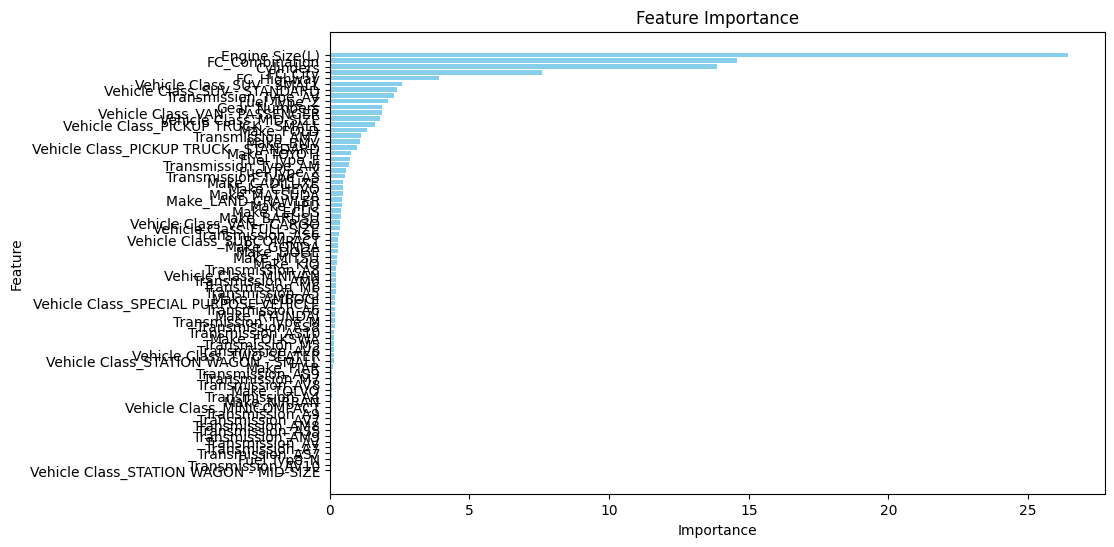

In [ ]:
feature_importance_viz(df_train, cb)

In [ ]:
train_preds_cb = cb.predict(X_train)
train_rmse_cb = rmse(y_train, train_preds_cb)

valid_preds_cb = cb.predict(X_valid)
valid_rmse_cb = rmse(y_valid, valid_preds_cb)

print("")
print(f"Train RMSE XGBoost Model: {train_rmse_cb}")
print("")
print(f"Valid RMSE XGBoost Model: {valid_rmse_cb}")


Train RMSE XGBoost Model: 17.99736204412422

Valid RMSE XGBoost Model: 19.757678578247294


In [ ]:
submission = cb.predict(X_test)

index = np.arange(54938, 78483)

df_submission = pd.DataFrame({'Id': index, 'CO2 Emissions(g/km)': submission})

df_submission.to_csv('Submission CBNonpool RMSE Valid 19.7576 231212 1932.csv', index=False)

#### <h2> Pooled (Better than Non-Pooled) </h2> ####

In [ ]:
cb = CatBoostRegressor(silent=True)
cb.fit(train_pool)

In [ ]:
cb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType

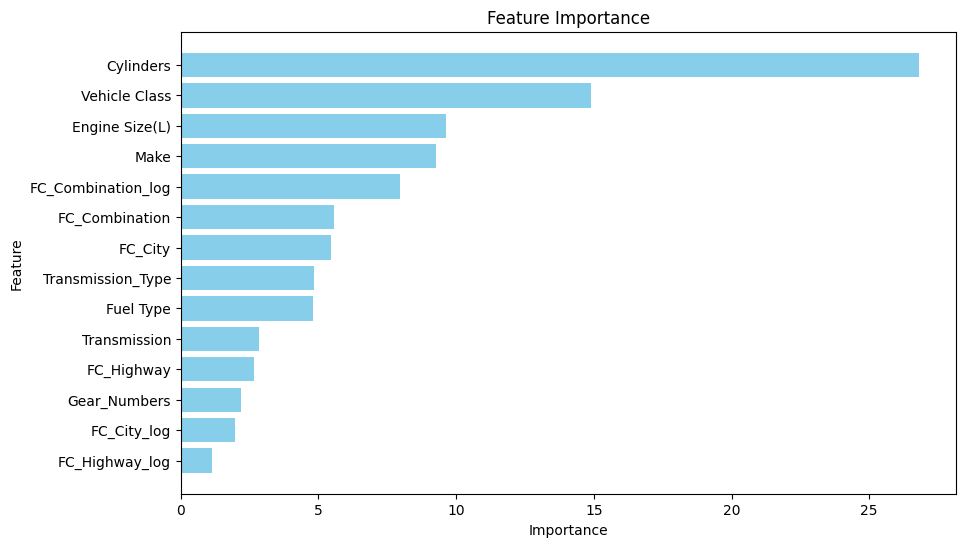

In [ ]:
feature_importance_viz(df_train_cb, cb)

In [ ]:
train_preds_cb = cb.predict(X_train_cb)
train_rmse_cb = rmse(y_train_cb, train_preds_cb)

valid_preds_cb = cb.predict(X_valid_cb)
valid_rmse_cb = rmse(y_valid_cb, valid_preds_cb)

print("")
print(f"Train RMSE XGBoost Model: {train_rmse_cb}")
print("")
print(f"Valid RMSE XGBoost Model: {valid_rmse_cb}")


Train RMSE XGBoost Model: 17.83179551630389

Valid RMSE XGBoost Model: 19.49508081457342


In [ ]:
submission = cb.predict(X_test_cb)

index = np.arange(54938, 78483)

df_submission = pd.DataFrame({'Id': index, 'CO2 Emissions(g/km)': submission})

df_submission.to_csv('Submission CBPool RMSE Valid 19.5680 231212 1319.csv', index=False)

In [ ]:
pickle.dump(cb, open('20231212-1319-CBPool-MVImpute.pkl', 'wb'))

### <h2> Optuna (Only for Non-Pooled) </h2> ###

In [ ]:
start=time.time()

kf = KFold(n_splits=5, shuffle=True, random_state=123)

def objective(trial):
  params = {"random_state": 0,
            "loss_function": "RMSE",
            "iterations": trial.suggest_categorical("iterations", [1000, 5000, 15000]),
            "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.1, 0.5]),
            "depth": trial.suggest_categorical("depth", [5, 8, 10]),
            "subsample": trial.suggest_float("subsample", 0.3, 0.5),
            "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.3, 0.5, log=True)}

  model = CatBoostRegressor(**params, silent=True)
  best_score = cross_val_score(model, train_pool, scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=123)
study_cb_ver2 = optuna.create_study(direction='minimize', sampler=sampler)
study_cb_ver2.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

### <h2> Manual </h2> ###

#### <h2> Looping </h2> ####

In [ ]:
%%time
depth = [5, 8, 10]
learning_rate = [0.01, 0.1, 0.5]
iterations = [1000, 5000, 15000]
subsample = [0.3, 0.5, 0.7]
valid_rmse = 100

for i in depth:
  for j in learning_rate:
    for k in iterations:
      for l in subsample:
        cb = CatBoostRegressor(silent=True, depth = i, learning_rate = j,
                              iterations = k, subsample = l,
                               eval_metric = 'RMSE', random_state = 0)
        cb.fit(train_pool)

        valid_preds_cb = cb.predict(X_valid_cb)
        valid_rmse_cb = rmse(y_valid_cb, valid_preds_cb)

        if valid_rmse_cb < valid_rmse:
          valid_rmse = valid_rmse_cb
          cb_best = cb
          best_params = cb.get_all_params()

print(best_params)
print(valid_rmse)

In [ ]:
cb_best.get_params()

{'iterations': 15000,
 'learning_rate': 0.01,
 'depth': 8,
 'loss_function': 'RMSE',
 'silent': True,
 'eval_metric': 'RMSE',
 'subsample': 0.7,
 'random_state': 0}

In [ ]:
print(best_params)
print(valid_rmse)

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'], 'iterations': 15000, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'random_score_type': 'NormalWithModelSizeDecrease', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'ctr_leaf_count_limit': 18446744073709551615, 'bayesian_matrix_reg': 0.10000000149011612, 'one_hot_max_size': 2, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'max_ctr_complexity': 4, 'model_size_reg': 0.5, 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount

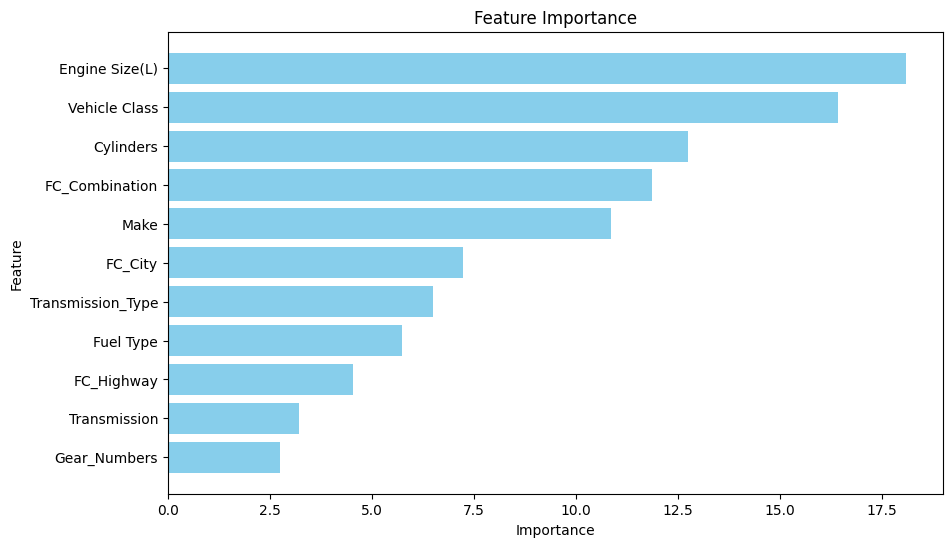

In [ ]:
feature_importance_viz(df_train_cb, cb_best)

In [ ]:
submission = cb_best.predict(X_test_cb)

index = np.arange(54938, 78483)

df_submission = pd.DataFrame({'Id': index, 'CO2 Emissions(g/km)': submission})

df_submission.to_csv('Submission CBPool RMSE Valid 19.2453 231212 2313.csv', index=False)

In [ ]:
pickle.dump(cb_best, open('20231212-2316-CBPool-MVImpute.pkl', 'wb'))

#### <h2> 1 by 1 Tuning </h2> ####

In [ ]:
start=time.time()
test_cb = CatBoostRegressor(silent=True, depth = 8, learning_rate = 0.004,
                            iterations = 26000, subsample = 0.5,
                            eval_metric = 'RMSE',
                            random_state = 0)
test_cb.fit(train_pool)

valid_preds_cb = test_cb.predict(X_valid_cb)
valid_rmse_cb = rmse(y_valid_cb, valid_preds_cb)
print(valid_rmse_cb)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

In [ ]:
valid_preds_cb = test_cb.predict(X_valid_cb)
valid_rmse_cb = rmse(y_valid_cb, valid_preds_cb)
print(valid_rmse_cb)

19.08364824935092


In [ ]:
test_cb.get_params()

{'iterations': 25000,
 'learning_rate': 0.004,
 'depth': 8,
 'loss_function': 'RMSE',
 'silent': True,
 'eval_metric': 'RMSE',
 'subsample': 0.5,
 'random_state': 0}

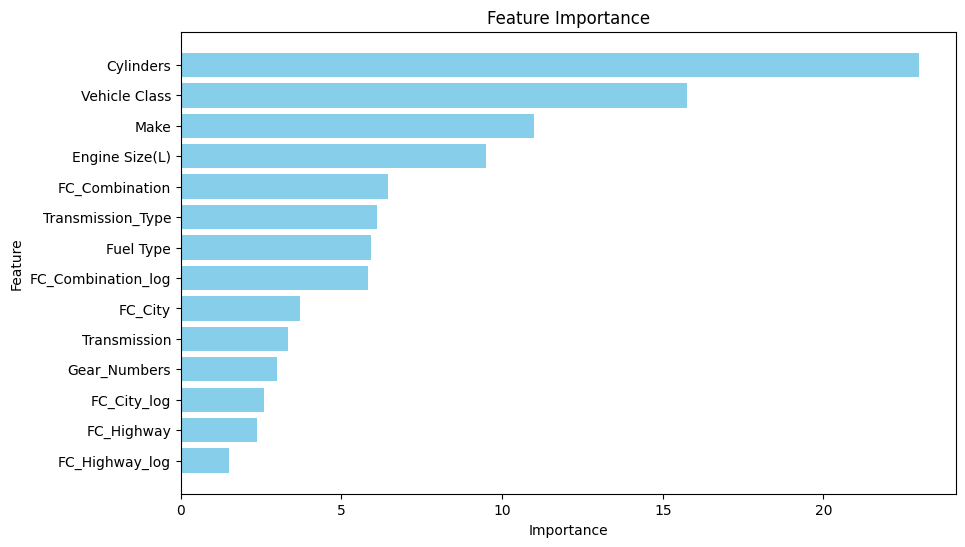

In [ ]:
feature_importance_viz(df_train_cb, test_cb)

In [ ]:
submission = test_cb.predict(X_test_cb)

index = np.arange(54938, 78483)

df_submission = pd.DataFrame({'Id': index, 'CO2 Emissions(g/km)': submission})

df_submission.to_csv('Submission CBPool RMSE Valid 19.0836 231214 1525.csv', index=False)

In [ ]:
pickle.dump(test_cb, open('20231214-1525-CBPool-MVImpute.pkl', 'wb'))

# <h1> Part 5: Submission </h1> #

In [ ]:
df_train_cb

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,FC_City,FC_Highway,FC_Combination,Gear_Numbers,Transmission_Type,Make_Region,y_train
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.90476190,7.20000000,9.80000000,8.0,AV,Asian,208
1,TOYOTI,PICKUP TRUCK - SMALL,nan,6.0,A5,X,13.79310345,9.70000000,11.96000000,5.0,A,Asian,325
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.20408163,7.29924900,8.89423603,6.0,AS,Asian,170
3,CHEVO,VAN - PASSENGER,nan,8.0,A6,X,17.30000000,11.70000000,14.78000000,6.0,A,American,362
4,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10000000,7.89935504,8.01000000,6.0,M,Asian,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54929,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90000000,8.80281690,10.50534091,10.0,AS,American,318
54930,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,21.00000000,10.60000000,16.32301062,6.0,M,American,303
54931,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20000000,12.50000000,15.63000000,7.0,AM,American,410
54932,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30000000,9.90000000,14.52000000,8.0,A,American,466


In [ ]:
df_test_cb

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,FC_City,FC_Highway,FC_Combination,Gear_Numbers,Transmission_Type,Make_Region
54934,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20000000,15.20000000,14.64598898,10.0,AS,American
54935,BMV,COMPACT,2.0,4.0,A8,Z,9.10000000,6.49979145,7.93036355,8.0,A,European
54936,JIPU,SUV - SMALL,1.3,4.0,A9,X,10.20155061,7.80000000,9.12000000,9.0,A,American
54937,LECUS,SUV - SMALL,nan,4.0,AS6,Z,12.54451545,8.89953019,11.01364128,6.0,AS,Asian
54938,BARUSU,COMPACT,2.0,nan,M6,Z,8.80281690,7.09929470,8.04000000,6.0,M,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...
78474,MITSU,SUV - SMALL,2.0,4.0,M5,X,12.54451545,7.50187547,8.98000000,5.0,M,Asian
78475,CHEVO,COMPACT,1.4,4.0,M6,X,8.69876416,5.50055006,7.30000000,6.0,M,American
78476,KIO,SUV - SMALL,nan,4.0,AS6,X,11.60000000,8.40000000,10.16260163,6.0,AS,Asian
78477,JIPU,SUV - SMALL,2.4,4.0,A9,X,10.50420168,8.40000000,9.60000000,9.0,A,American


In [ ]:
df_train_cb.to_csv('Train_TutorPuh.csv')
df_test_cb.to_csv('Test_TutorPuh.csv')
pickle.dump(test_cb, open('Model_TutorPuh.pkl', 'wb'))
print("Done")

# <h1> Part 6: Solution and Recommendation </h1> #

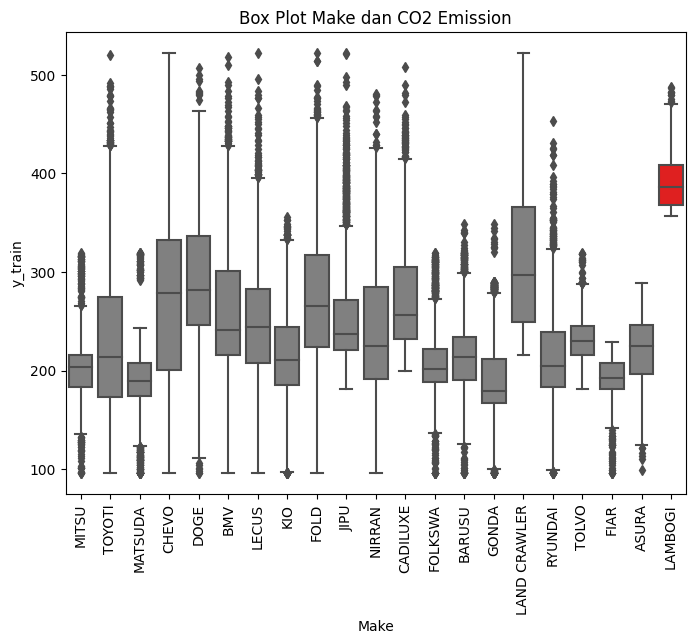

In [ ]:
plt.figure(figsize=(8, 6))
max_category = df_train_cb.groupby('Make')['y_train'].mean().idxmax()

colors = ['red' if kategori == max_category else 'grey' for kategori in df_train_cb['Make'].unique()]
sns.boxplot(x='Make', y='y_train', data=df_train_cb, palette={kategori: warna for kategori, warna in zip(df_train_cb['Make'].unique(), colors)})
plt.title('Box Plot Make dan CO2 Emission')
plt.xticks(rotation=90)
plt.show()

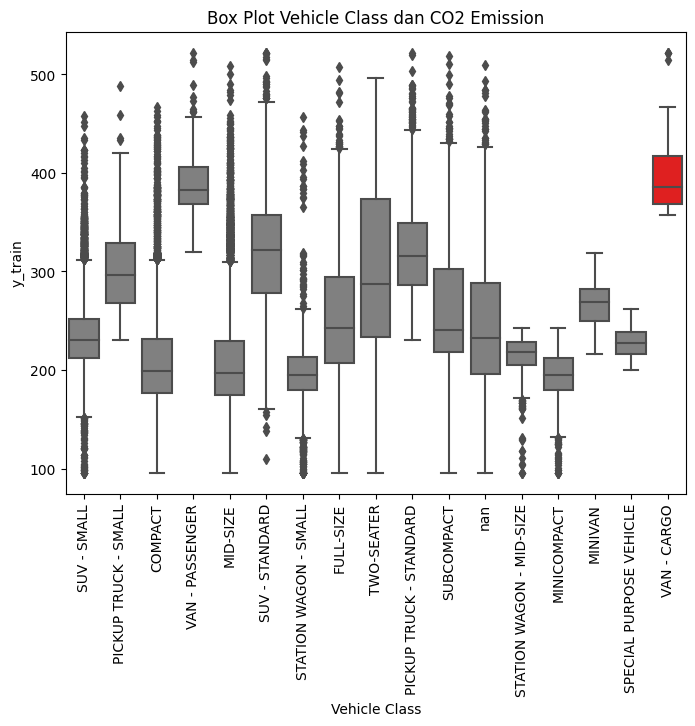

In [ ]:
plt.figure(figsize=(8, 6))
max_category = df_train_cb.groupby('Vehicle Class')['y_train'].mean().idxmax()

colors = ['red' if kategori == max_category else 'grey' for kategori in df_train_cb['Vehicle Class'].unique()]
sns.boxplot(x='Vehicle Class', y='y_train', data=df_train_cb, palette={kategori: warna for kategori, warna in zip(df_train_cb['Vehicle Class'].unique(), colors)})
plt.title('Box Plot Vehicle Class dan CO2 Emission')
plt.xticks(rotation=90)
plt.show()

Dari boxplot, dapat dilihat bahwa median boxplot Merk 'Lambogi' paling tinggi dalam menghasilkan CO2 Emissions. Sedangkan, kelas kendaraan yang menghasilkan CO2 Emmisions paling tinggi adalah VAN - CARGO. Rekomendasi dari kami adalah untuk membatasi penggunaan kendaraan bermerk Lambogi untuk masuk pada kota Wiliwilowilev. Selain itu, penggunaan kelas kendaraan bertipe VAN - CARGO juga harus dibatasi.

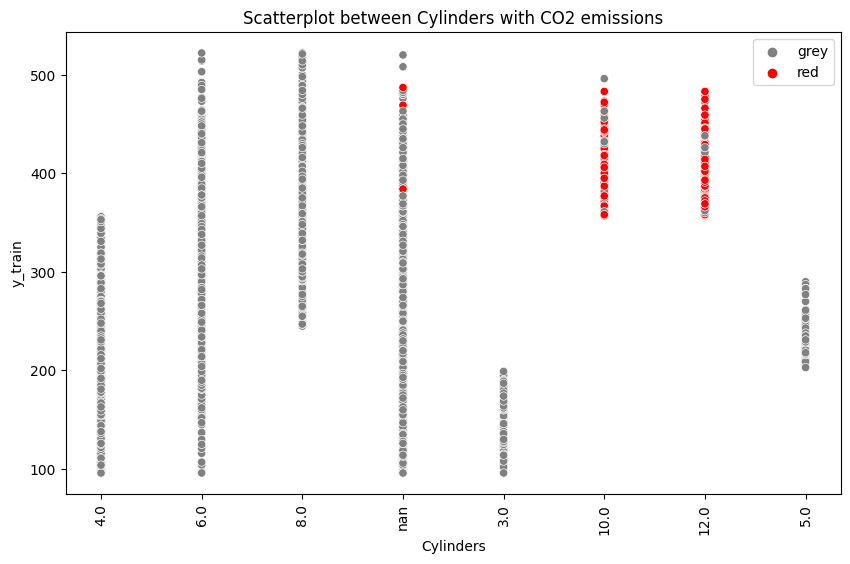

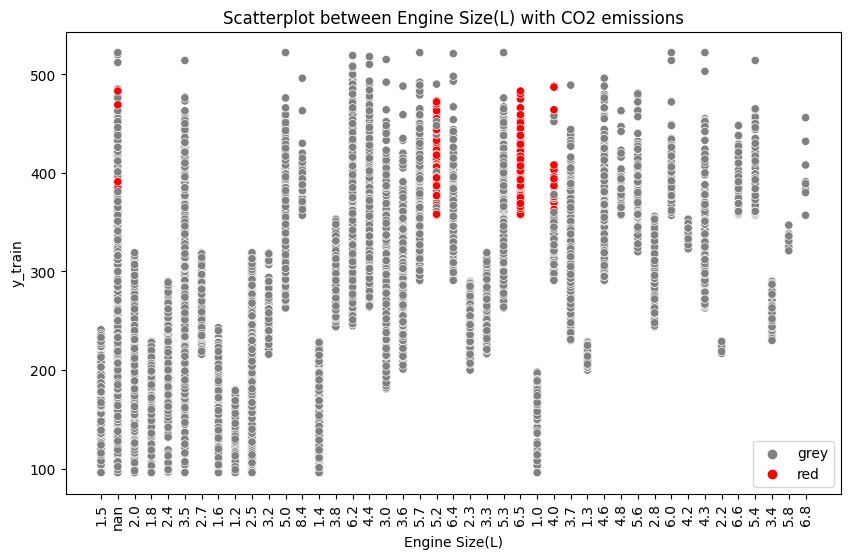

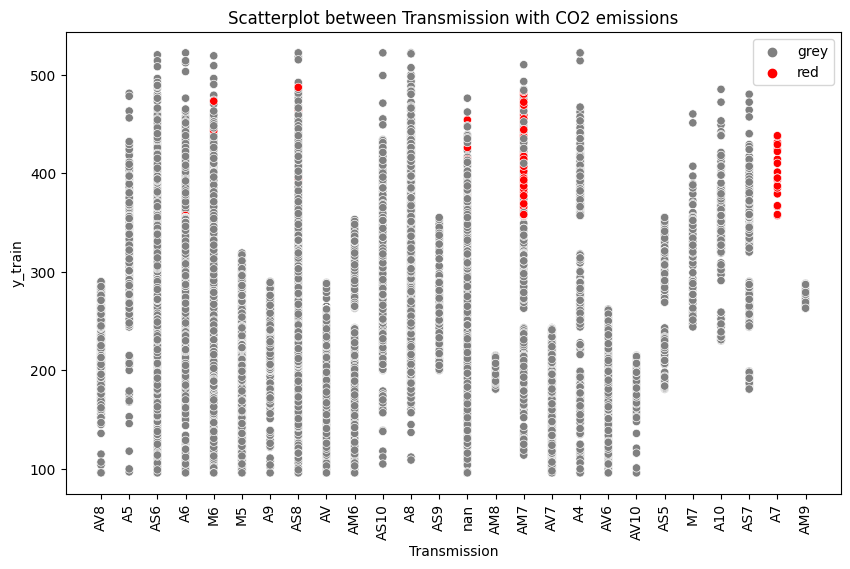

In [ ]:
highlight_category = 'LAMBOGI'

cat_col = ['Cylinders', 'Engine Size(L)', 'Transmission']

for c in cat_col:
    plt.figure(figsize=(10, 6))

    # Menentukan warna untuk setiap baris berdasarkan kondisi
    colors = ['red' if Make == highlight_category else 'grey' for Make in df_train_cb['Make']]

    sns.scatterplot(x=c, y='y_train', data=df_train_cb, hue=colors, palette={'red': 'red', 'grey': 'grey'})
    plt.title(f"Scatterplot between {c} with CO2 emissions")
    plt.xticks(rotation=90)
    plt.show()

Setelah meninjau lebih jauh dari merk 'LAMBOGI', dapat dilihat bahwa terdapat faktor lain yang kemungkinan juga mempengaruhi besarnya CO2 Emissions yang dihasilkan oleh 'LAMBOGI'. Rekomendasi lain yang dapat kami berikan adalah dengan membatasi penggunaa kendaraan dengan Cylinders berukuran 10 dan 12, Engine Size berukuran 6.5 L, dan Transmission dengan tipe A7 atau AM7